In [1]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
dsSell2013 = pd.read_csv("sell2013.csv", low_memory=False)
dsSell2014 = pd.read_csv("sell2014.csv", low_memory=False)
dsSell2015 = pd.read_csv("sell2015.csv", low_memory=False)
dsSell2016 = pd.read_csv("sell2016.csv", low_memory=False)
dsSell2017 = pd.read_csv("sell2017.csv", low_memory=False)

In [11]:
dsSell2013.columns

Index(['created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_in_m2', 'price_usd_per_m2', 'floor', 'rooms', 'expenses',
       'properati_url', 'image_thumbnail'],
      dtype='object')

In [4]:
dsSell2014.columns

Index(['created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_in_m2', 'price_usd_per_m2', 'floor', 'rooms', 'expenses',
       'properati_url', 'image_thumbnail'],
      dtype='object')

In [5]:
dsSell2015.columns

Index(['created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'extra', 'image_thumbnail'],
      dtype='object')

In [6]:
#unimos todos los csv y filtramos para que solo queda GBA y CABA
dsSell = dsSell2013.append(dsSell2014).append(dsSell2015).append(dsSell2016).append(dsSell2017)

In [12]:
dsSell.head()

,country_name,created_on,currency,description,expenses,extra,floor,geonames_id,id,image_thumbnail,...,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title,municipio,zona
3,NaN,2012-08-08,USD,NaN,NaN,NaN,NaN,3427467.0,NaN,http://cf-thumbs.properati.com.ar/uMwzJsvexa1C...,...,http://www.properati.com.ar/ak_venta_casa_vill...,house,4.0,NaN,NaN,349.0,NaN,NaN,General San Martín,Bs.As. G.B.A. Zona Norte
6,NaN,2012-08-08,USD,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/BJum1WvpYb6P...,...,http://www.properati.com.ar/ax_venta_casa_san-...,house,NaN,NaN,NaN,153.0,NaN,NaN,General San Martín,Bs.As. G.B.A. Zona Norte
10,NaN,2012-08-08,USD,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/77Q-mNgsgx7O...,...,http://www.properati.com.ar/md_venta_departame...,apartment,NaN,NaN,NaN,85.0,NaN,NaN,Tigre,Bs.As. G.B.A. Zona Norte
11,NaN,2012-08-08,USD,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/DuUbXCV9Xzos...,...,http://www.properati.com.ar/rp_venta_casa_pilar__,house,4.0,NaN,NaN,383.0,NaN,NaN,Pilar,Bs.As. G.B.A. Zona Norte
12,NaN,2012-08-08,USD,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/UAN_2iHtE0hA...,...,http://www.properati.com.ar/3vs_venta_casa_tig...,house,NaN,NaN,NaN,255.0,NaN,NaN,Tigre,Bs.As. G.B.A. Zona Norte


In [7]:
#Queremos quedarnos con la zona, el municipio y los que esten en CABA y GBA

dsSell['municipio'] = dsSell['place_with_parent_names'].apply(lambda x: x.split('|')[3])
dsSell['zona'] = dsSell['place_with_parent_names'].apply(lambda x: x.split('|')[2])

dsSell['filtro'] = dsSell['zona'].apply(lambda x: ((x=='Capital Federal')or(x=='Bs.As. G.B.A. Zona Norte')or(x=='Bs.As. G.B.A. Zona Sur')or(x=='Bs.As. G.B.A. Zona Oeste')))
dsSell = dsSell[dsSell.filtro]
dsSell.drop('filtro', axis=1, inplace=True)

In [8]:
#Como nos importa mucho el precio con respecto a otras cosas vamos a sacar a los que tienen esa columna en NaN

dsSell['tiene_precio'] = dsSell['price'].apply(lambda x: pd.notnull(x))
dsSell = dsSell[dsSell.tiene_precio]
dsSell.drop('tiene_precio', axis=1, inplace=True)

In [9]:
dsSell.groupby('municipio').price_aprox_usd.mean().head()

municipio
                   270231.721642
Abasto             155498.772601
Agronomía          157318.141667
Almagro            148182.569555
Almirante Brown    196867.297707
Name: price_aprox_usd, dtype: float64

In [10]:
dsSell.columns

Index(['country_name', 'created_on', 'currency', 'description', 'expenses',
       'extra', 'floor', 'geonames_id', 'id', 'image_thumbnail', 'lat',
       'lat-lon', 'lon', 'operation', 'place_name', 'place_with_parent_names',
       'price', 'price_aprox_local_currency', 'price_aprox_usd',
       'price_per_m2', 'price_usd_per_m2', 'properati_url', 'property_type',
       'rooms', 'state_name', 'surface_covered_in_m2', 'surface_in_m2',
       'surface_total_in_m2', 'title', 'municipio', 'zona'],
      dtype='object')

In [13]:
#cuantos tipos de vivienda se vende

dsSell['property_type'].value_counts()

apartment    173536
house        101135
PH            19129
store          8020
Name: property_type, dtype: int64

In [14]:
#lugares donde mas se vende
dsSell['place_name'].value_counts()

Tigre                                  12115
Nordelta                               11696
Capital Federal                        11499
Pilar                                  10249
Belgrano                                9505
Ramos Mejía                             9379
Palermo                                 8294
Caballito                               6364
Olivos                                  6311
Morón                                   5211
San Isidro                              5119
Villa Urquiza                           4635
Benavidez                               4610
Villa Crespo                            4398
Barrio Norte                            4332
Recoleta                                4257
Flores                                  4241
Martínez                                4208
Haedo                                   4072
Ituzaingó                               4045
La Plata                                3942
Vicente López                           3845
Almagro   

In [15]:
dsSell[['place_name', 'price']]

,place_name,price
3,Villa Ballester,110000.0
6,San Martín,99000.0
10,Tigre,110000.0
11,Pilar,650000.0
12,Tigre,300000.0
13,Las Cañitas,600000.0
14,Flores,220000.0
16,Floresta,51900.0
17,Parque Centenario,195000.0
18,Liniers,115000.0


In [16]:
aux = dsSell.groupby('place_name').mean().reset_index().sort_values(by = 'price',ascending= False)[['place_name', 'price']]
aux

,place_name,price
610,Área de Promoción El Triángulo,6.000000e+06
490,San Isidro Chico,1.798571e+06
27,Bahía del Sol,1.614286e+06
235,Distrito de las Artes,1.584580e+06
528,The Boating Club,1.295000e+06
105,Barrio La Isla,1.283365e+06
106,Barrio Lagos del Golf 2,1.087000e+06
100,Barrio El Yacht,1.061250e+06
93,Barrio Cerrado Lagos del Norte,1.030000e+06
201,Club Newman,1.009333e+06


<IPython.core.display.Javascript object>


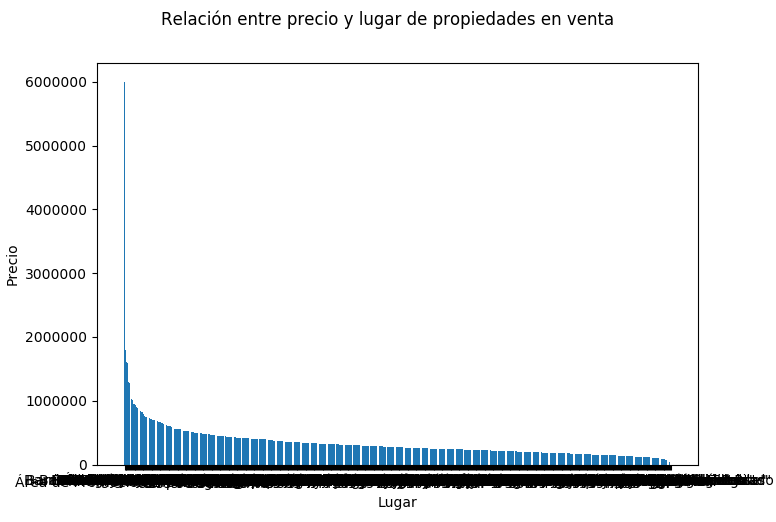

In [17]:
%matplotlib notebook

numeros = list(range(0, len(aux['place_name'])))
plt.bar(numeros, aux['price'])
plt.suptitle("Relación entre precio y lugar de propiedades en venta")
plt.xlabel("Lugar")
plt.ylabel("Precio")
plt.xticks(numeros, aux['place_name'])
plt.show()


In [21]:
aux = dsSell.groupby('place_name').count().reset_index().rename(columns={'price':'cantidad'}).sort_values(by = 'cantidad',ascending= False)[['place_name', 'cantidad']]
aux

,place_name,cantidad
529,Tigre,12115
421,Nordelta,11696
183,Capital Federal,11499
444,Pilar,10249
156,Belgrano,9505
464,Ramos Mejía,9379
429,Palermo,8294
178,Caballito,6364
423,Olivos,6311
417,Morón,5211


<IPython.core.display.Javascript object>


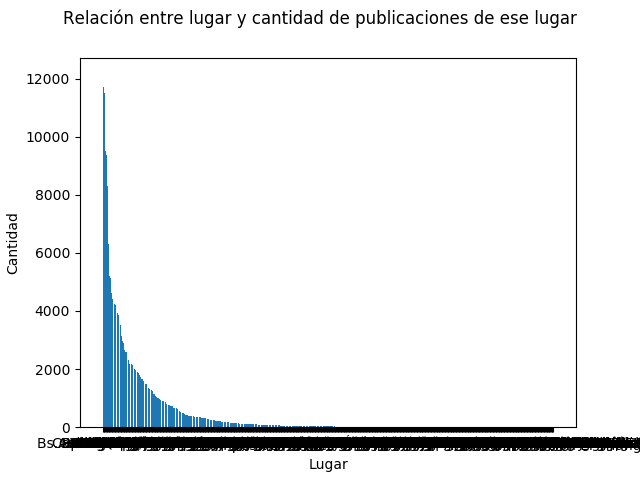

In [23]:
%matplotlib notebook

numeros = list(range(0, len(aux['place_name'])))
plt.bar(numeros, aux['cantidad'])
plt.suptitle("Relación entre lugar y cantidad de publicaciones de ese lugar")
plt.xlabel("Lugar")
plt.ylabel("Cantidad")
plt.xticks(numeros, aux['place_name'])
plt.show()


In [24]:
#convertimos el formato de la fecha
dsSell['created_on'] = dsSell['created_on'] .map(lambda x: x.split('-')[0]+x.split('-')[1]+x.split('-')[2])
dsSell

,country_name,created_on,currency,description,expenses,extra,floor,geonames_id,id,image_thumbnail,...,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title,municipio,zona
3,NaN,20120808,USD,NaN,NaN,NaN,NaN,3427467.0,NaN,http://cf-thumbs.properati.com.ar/uMwzJsvexa1C...,...,http://www.properati.com.ar/ak_venta_casa_vill...,house,4.0,NaN,NaN,349.0,NaN,NaN,General San Martín,Bs.As. G.B.A. Zona Norte
6,NaN,20120808,USD,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/BJum1WvpYb6P...,...,http://www.properati.com.ar/ax_venta_casa_san-...,house,NaN,NaN,NaN,153.0,NaN,NaN,General San Martín,Bs.As. G.B.A. Zona Norte
10,NaN,20120808,USD,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/77Q-mNgsgx7O...,...,http://www.properati.com.ar/md_venta_departame...,apartment,NaN,NaN,NaN,85.0,NaN,NaN,Tigre,Bs.As. G.B.A. Zona Norte
11,NaN,20120808,USD,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/DuUbXCV9Xzos...,...,http://www.properati.com.ar/rp_venta_casa_pilar__,house,4.0,NaN,NaN,383.0,NaN,NaN,Pilar,Bs.As. G.B.A. Zona Norte
12,NaN,20120808,USD,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/UAN_2iHtE0hA...,...,http://www.properati.com.ar/3vs_venta_casa_tig...,house,NaN,NaN,NaN,255.0,NaN,NaN,Tigre,Bs.As. G.B.A. Zona Norte
13,NaN,20120808,USD,NaN,NaN,NaN,5.0,NaN,NaN,http://cf-thumbs.properati.com.ar/pJ0Vap4MCjhW...,...,http://www.properati.com.ar/7a6_venta_departam...,apartment,4.0,NaN,NaN,240.0,NaN,NaN,Las Cañitas,Capital Federal
14,NaN,20120809,USD,NaN,NaN,NaN,NaN,3433918.0,NaN,http://cf-thumbs.properati.com.ar/7LLinQKdItkV...,...,http://www.properati.com.ar/8sf_venta_casa_flo...,house,5.0,NaN,NaN,250.0,NaN,NaN,Flores,Capital Federal
16,NaN,20120815,USD,NaN,NaN,NaN,NaN,3433910.0,NaN,http://cf-thumbs.properati.com.ar/folXLAuUibJC...,...,http://www.properati.com.ar/cq9_venta_departam...,apartment,1.0,NaN,NaN,25.0,NaN,NaN,Floresta,Capital Federal
17,NaN,20120815,USD,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/QIshWpCxB_sU...,...,http://www.properati.com.ar/crs_venta_casa_par...,house,4.0,NaN,NaN,180.0,NaN,NaN,Parque Centenario,Capital Federal
18,NaN,20120817,USD,NaN,NaN,NaN,NaN,3431333.0,NaN,http://cf-thumbs.properati.com.ar/vfIoxXFjrZY7...,...,http://www.properati.com.ar/cv5_venta_departam...,apartment,3.0,NaN,NaN,108.0,NaN,NaN,Liniers,Capital Federal


In [ ]:
#pasar precios a pesos argentinos


#usamos un promedio aprox del dolar en estos 4 años. se peude hacer ocn mas precisión
dsSell['priceInUsd'] = dsSell[['price', 'currency']].apply(lambda x: x[0] if x[1] == 'USD' else x[0] / 14, axis=1) 

dsSell['priceInUsd']